In [1]:
import pandas as pd
import numpy as np
import json
import gzip
import matplotlib.pyplot as plt
%matplotlib inline
import io
import glob

In [19]:
ls

20131128_201_phs.jsonl.gz   20131204_169_std.jsonl.gz
20131128_201_reco.jsonl.gz  20141017_171_phs.jsonl.gz
20131128_201_std.jsonl.gz   20141017_171_reco.jsonl.gz
20131204_169_phs.jsonl.gz   20141017_171_std.jsonl.gz
20131204_169_reco.jsonl.gz  Untitled.ipynb


In [2]:
def read_jsonl_gz(path):
    f = io.TextIOWrapper(gzip.open(path, 'r'), encoding='utf-8')
    return pd.DataFrame(
        [json.loads(l) for l in f]
    )

In [3]:
class Analyses:
    types = ['std', 'reco', 'phs']
    def __init__(self):
        for name in self.types:
            setattr(
                self,
                name,
                pd.concat(
                    read_jsonl_gz(path) 
                    for path in sorted(glob.glob('*{0}.jsonl.gz'.format(name)))
                )
            )
analyses = Analyses()

In [4]:
len(analyses.std), len(analyses.reco), len(analyses.phs), 

(4531, 3817, 3479)

In [5]:
observables = analyses.std.dtypes[analyses.std.dtypes.isin([np.dtype('float64'), np.dtype('int64')])].index.tolist()

In [6]:
for obs in observables:
    print(obs, analyses.phs[obs].min(), analyses.phs[obs].max())

Alpha -1.57065130663 1.5693924165
Alpha_Off_1 -1.57020788622 1.57010007525
Alpha_Off_2 -1.57010250922 1.57053451144
Alpha_Off_3 -1.5707530491 1.57050782865
Alpha_Off_4 -1.57043415811 1.57005744738
Alpha_Off_5 -1.57072795003 1.57054446559
AzPointing -154.037686185 -117.853121553
AzSourceCalc -156.062050412 -117.552887777
AzTracking -155.436666667 -118.292777778
COGx -180.494405242 178.640710558
COGy -181.356557377 180.206185567
ConcCore 0.0 0.833333333333
Concentration_onePixel 0.012381251966 0.555555555556
Concentration_twoPixel 0.0246115130544 0.833333333333
CosDeltaAlpha -0.999999685836 0.99999777984
CosDeltaAlpha_Off_1 -0.999992233725 0.99999999962
CosDeltaAlpha_Off_2 -0.999999025392 0.999999906577
CosDeltaAlpha_Off_3 -0.999999357997 0.999993870915
CosDeltaAlpha_Off_4 -0.999998650448 0.999999698397
CosDeltaAlpha_Off_5 -0.999997666008 0.999999993964
Delta -1.57079632679 1.57079632679
Disp 1.62614816592 117.94
Distance 3.37471410888 235.343653538
Distance_Off_1 2.51086124487 233.87398

/home/dneise/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


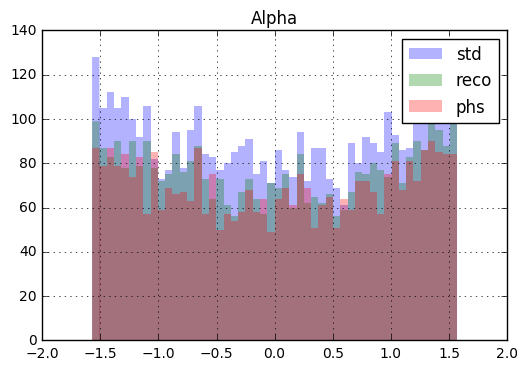

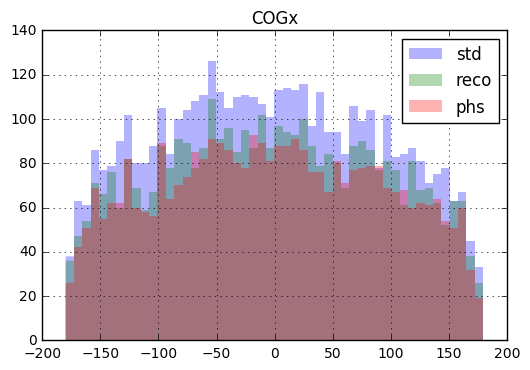

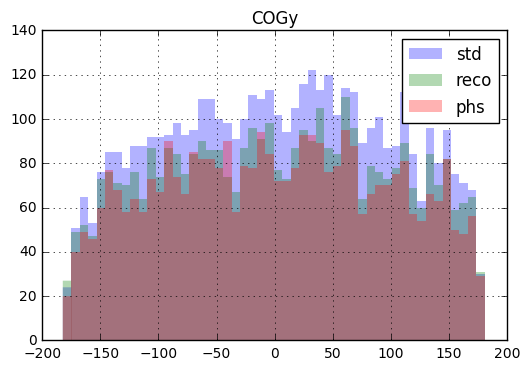

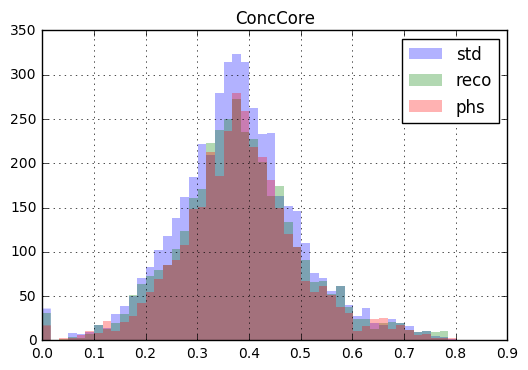

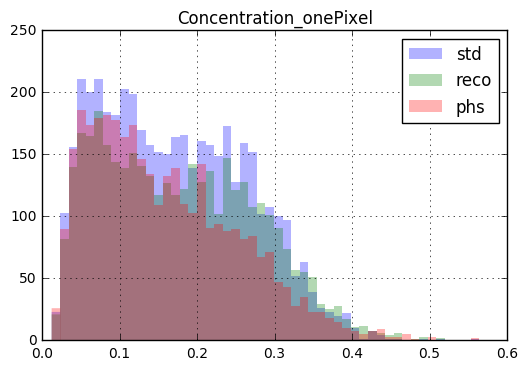

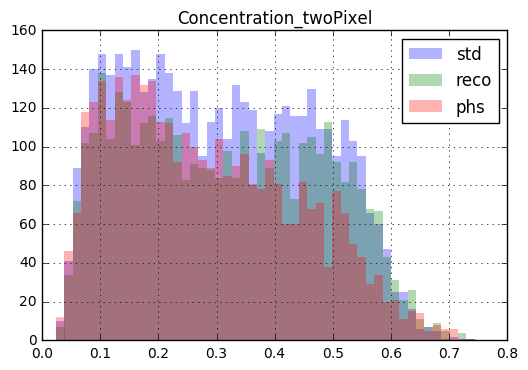

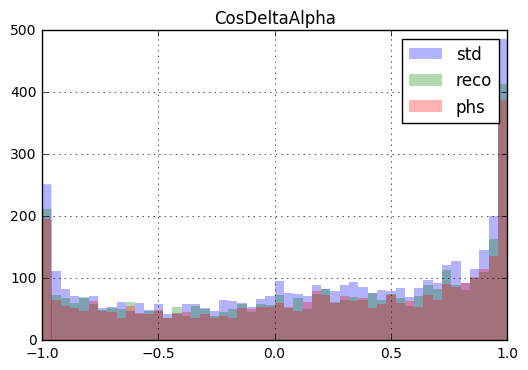

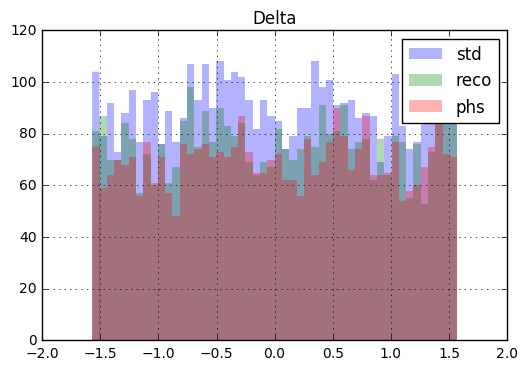

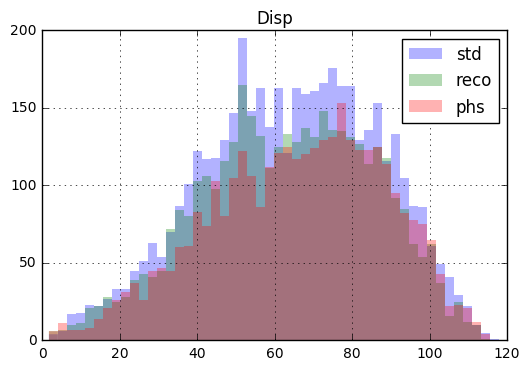

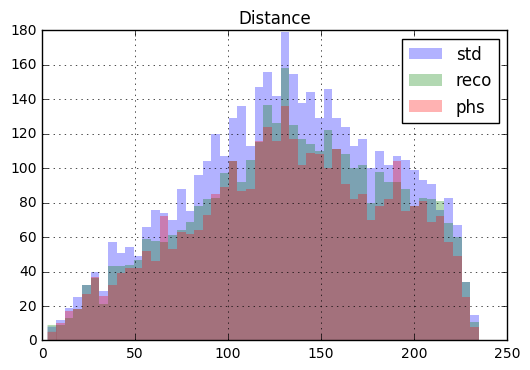

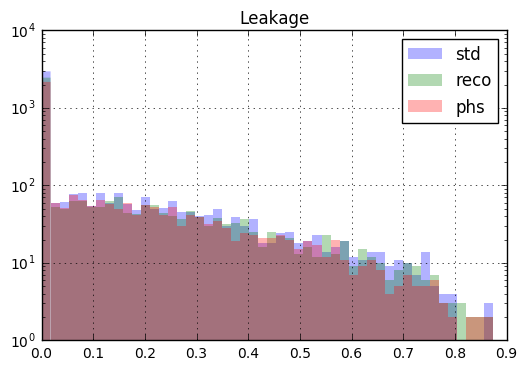

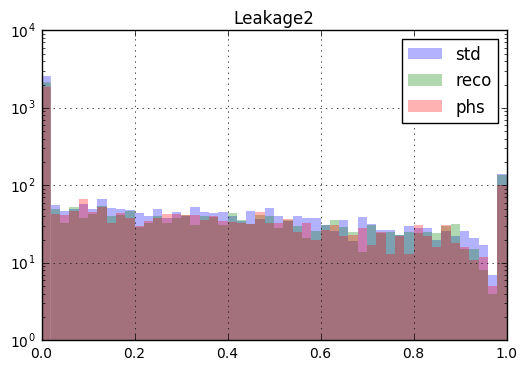

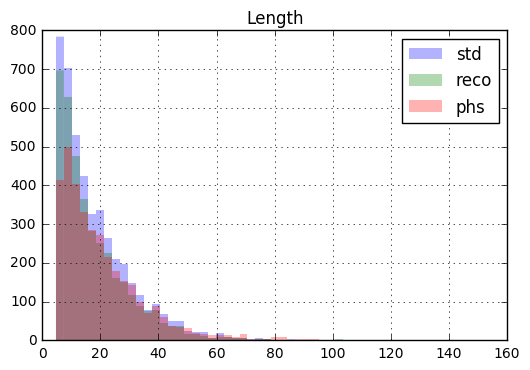

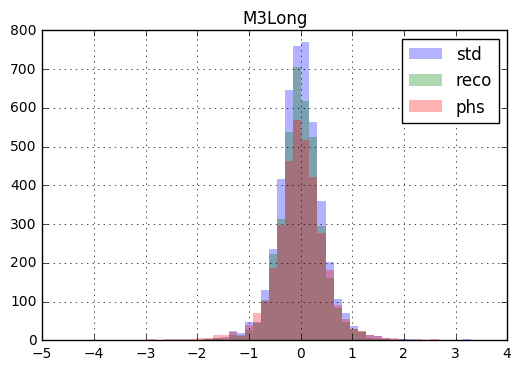

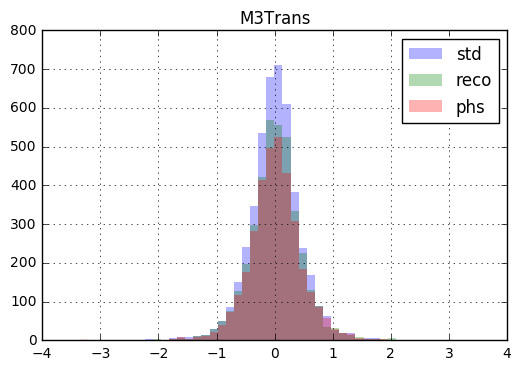

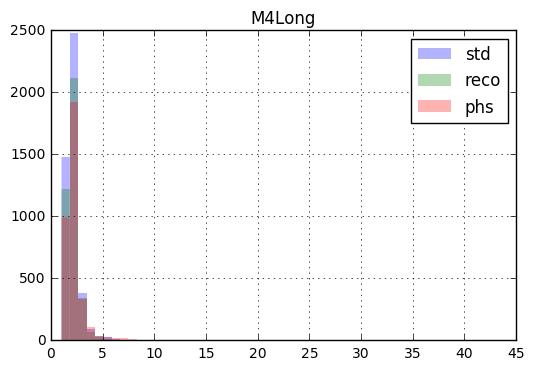

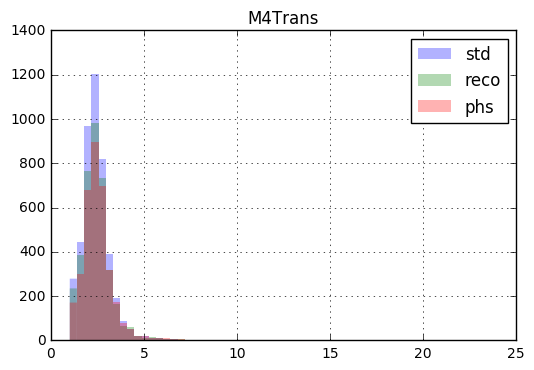

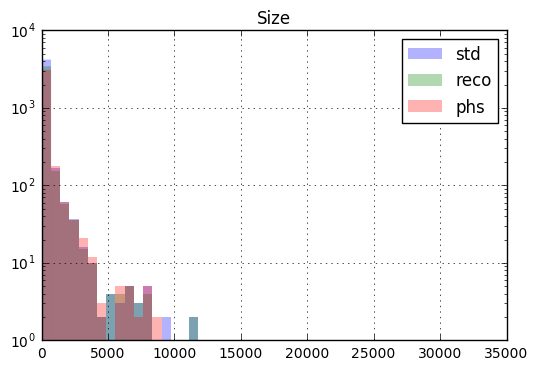

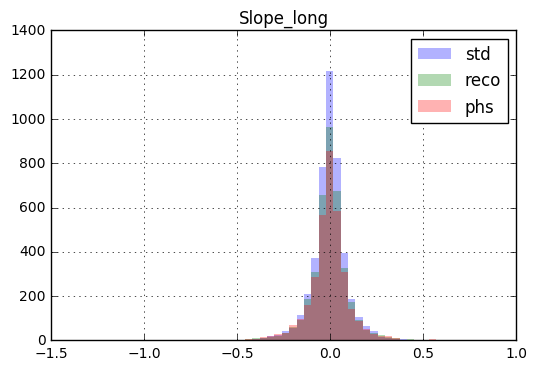

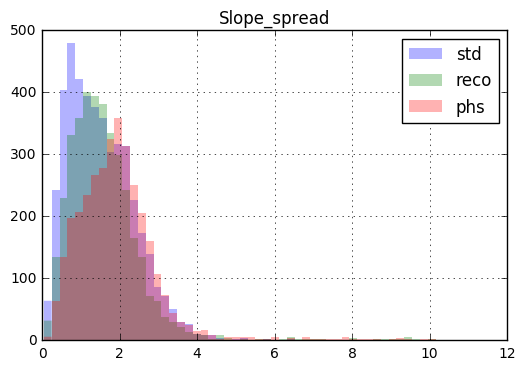

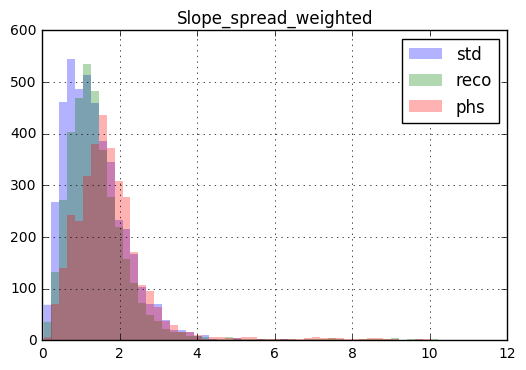

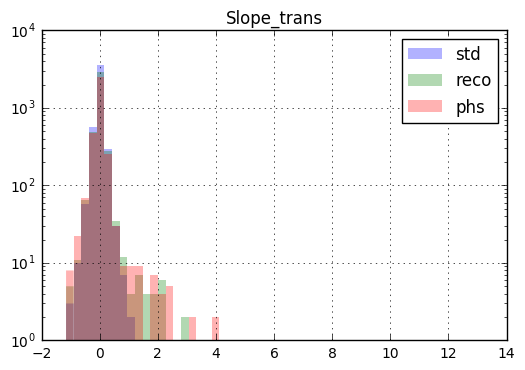

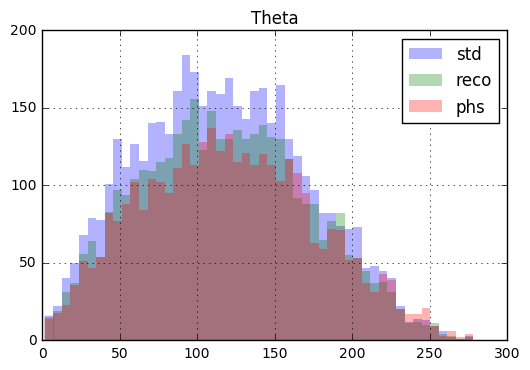

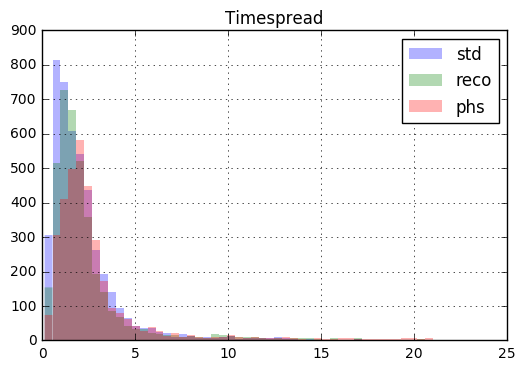

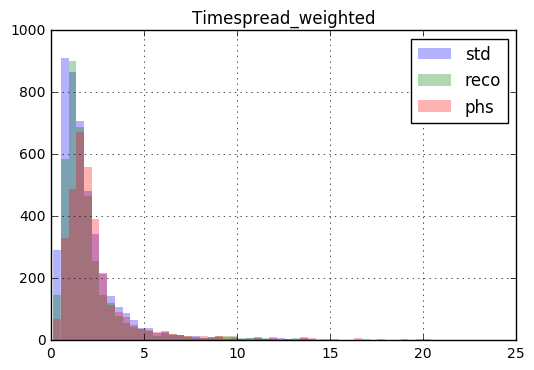

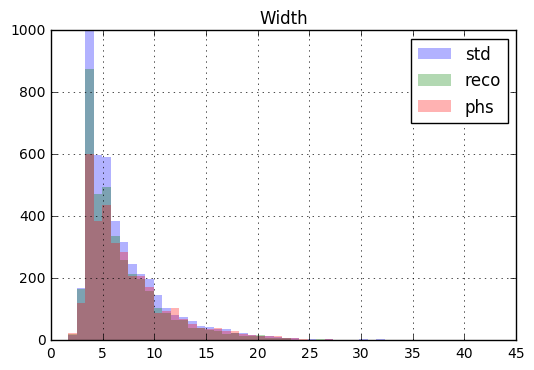

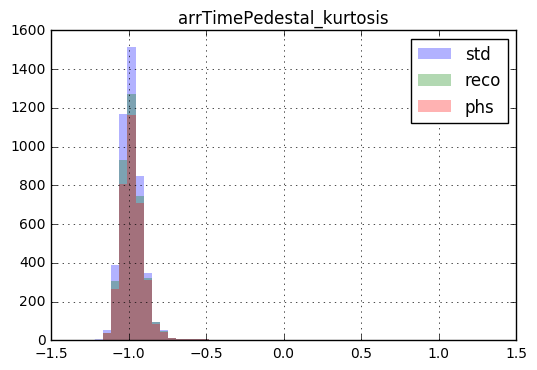

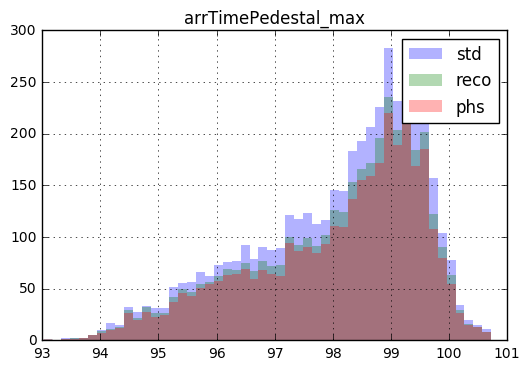

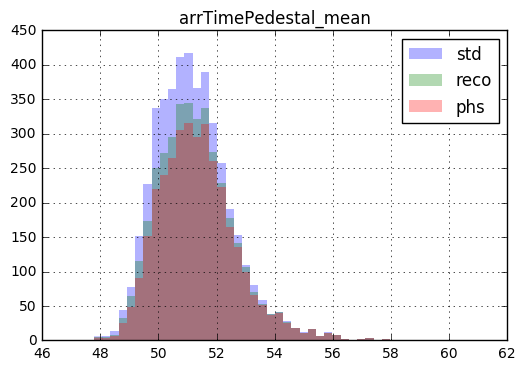

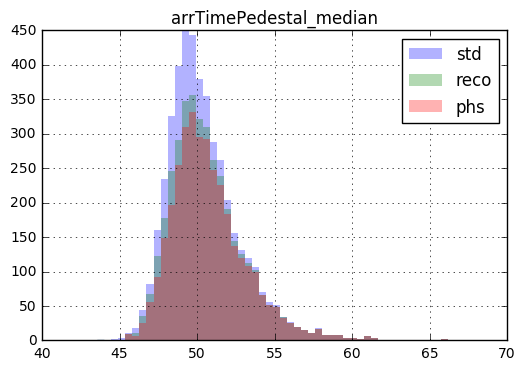

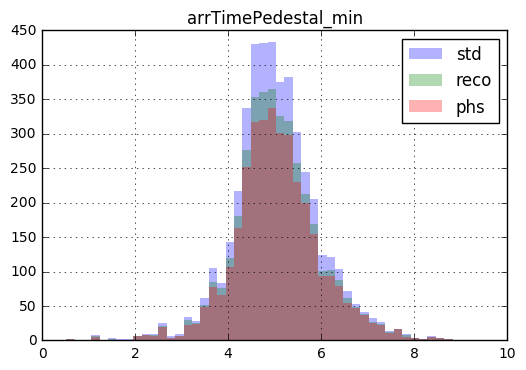

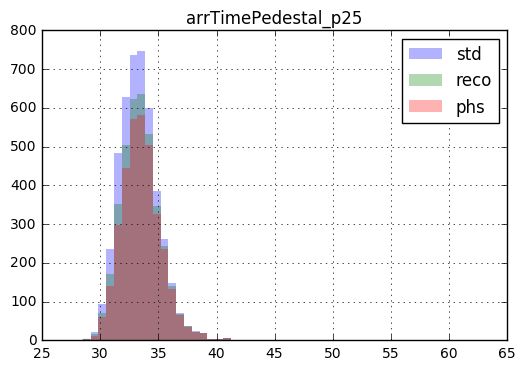

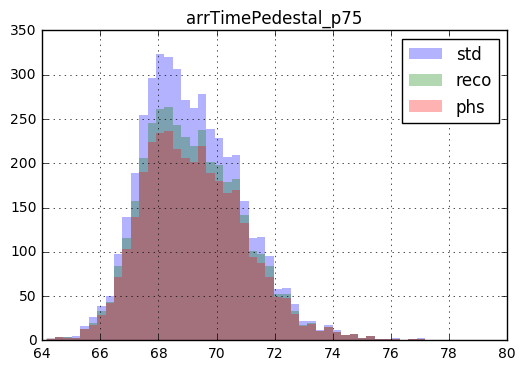

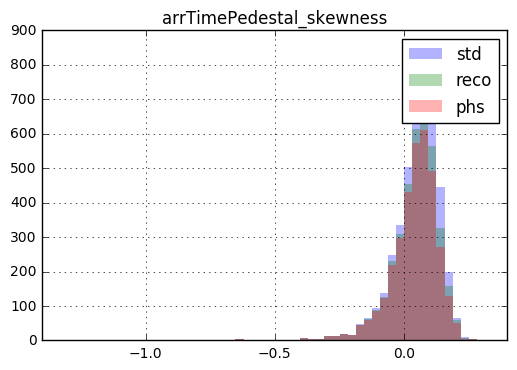

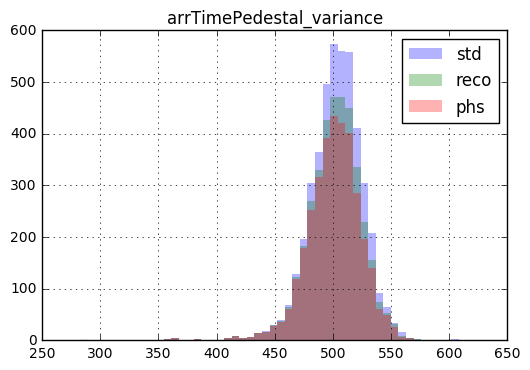

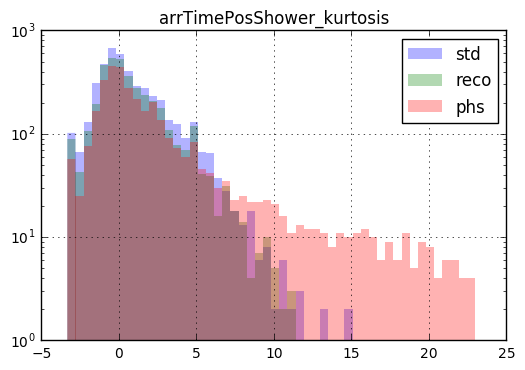

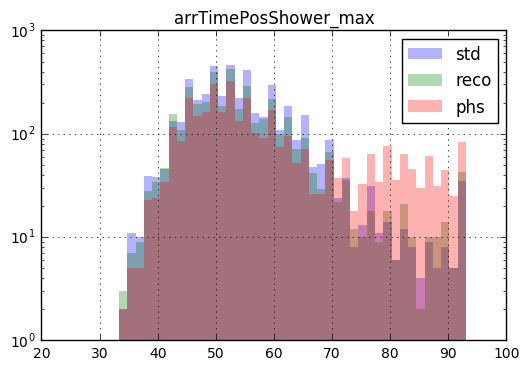

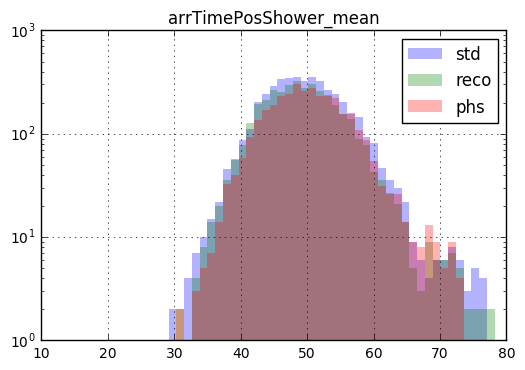

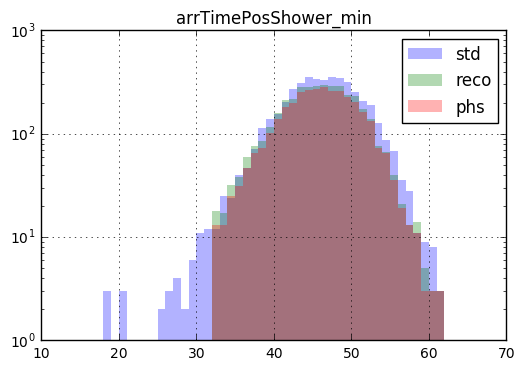

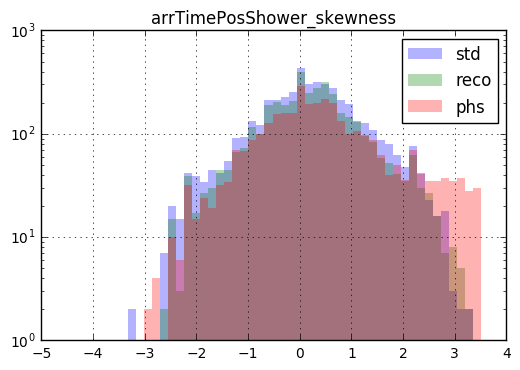

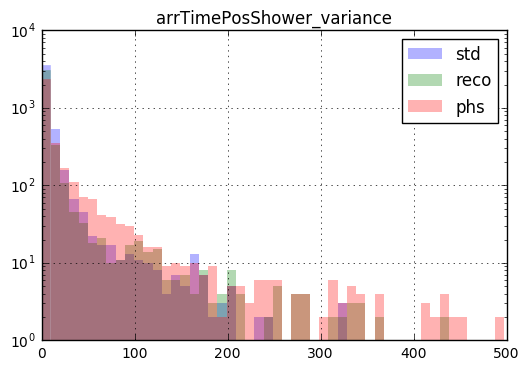

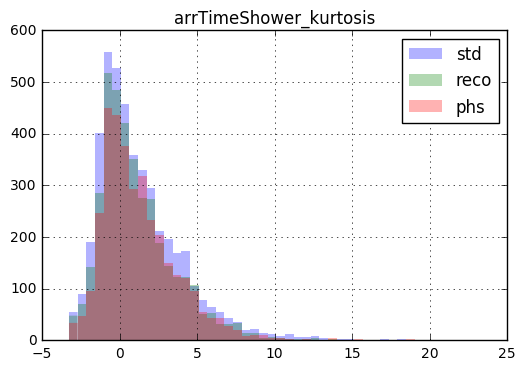

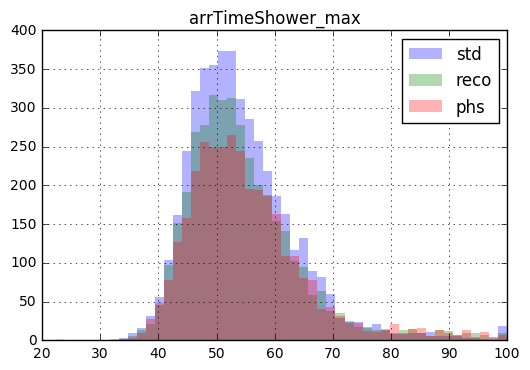

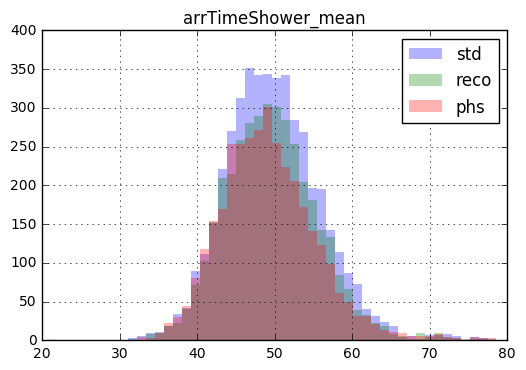

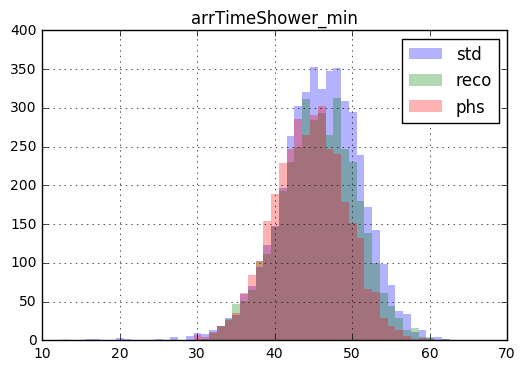

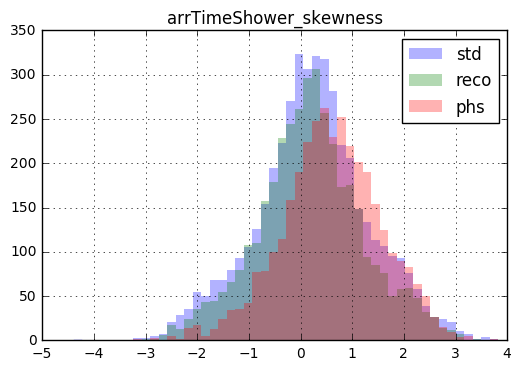

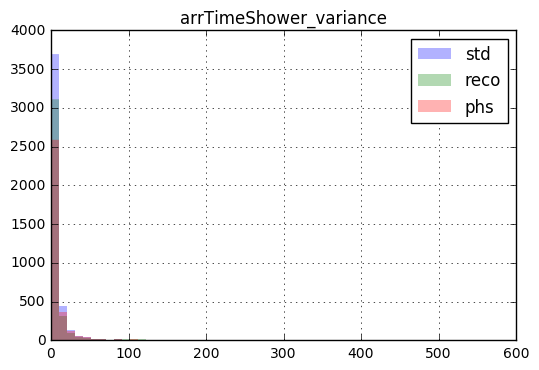

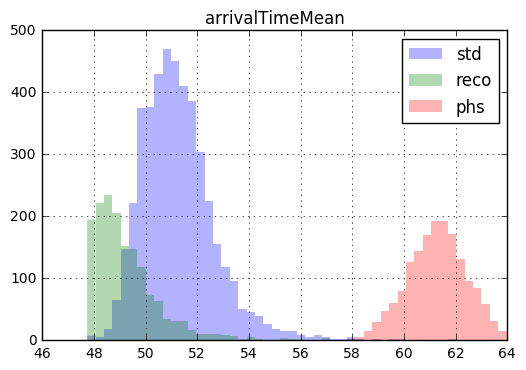

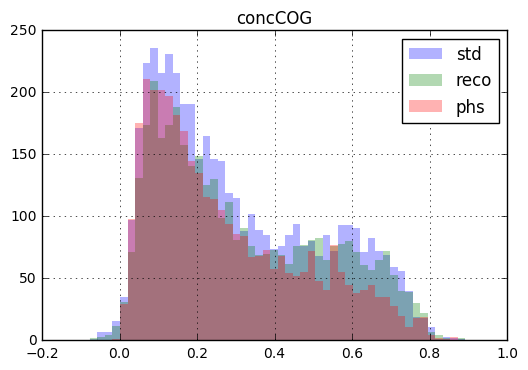

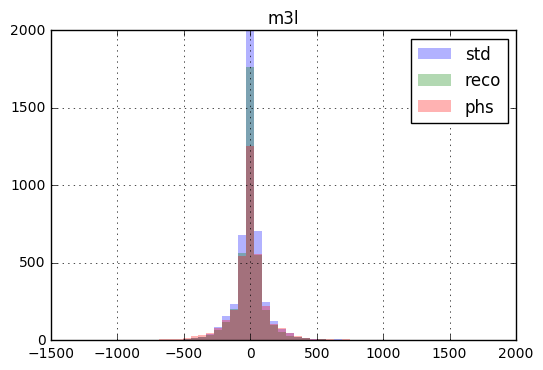

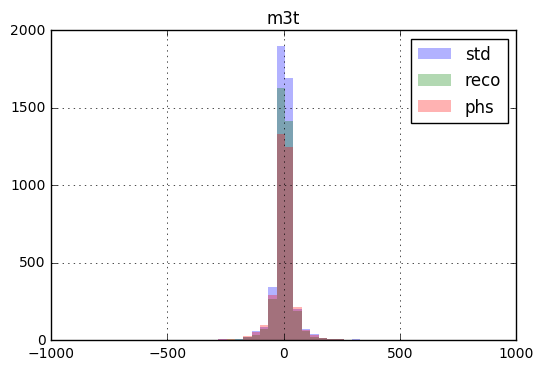

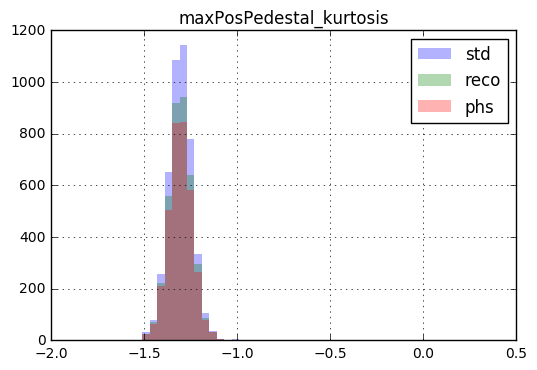

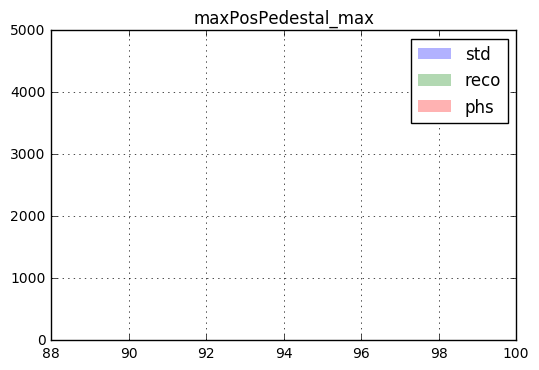

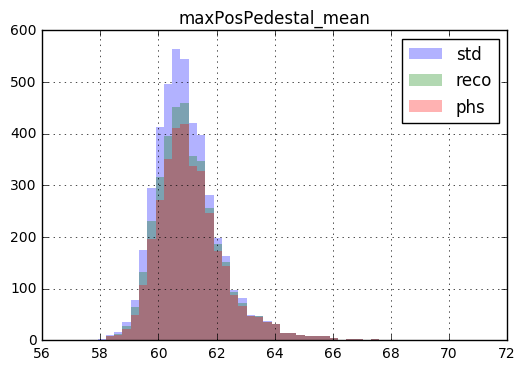

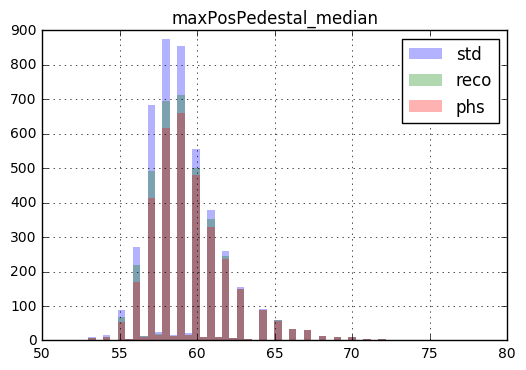

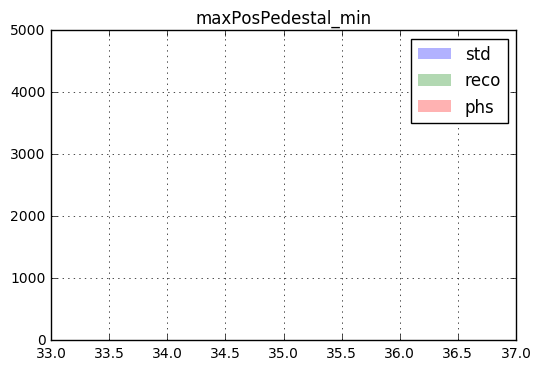

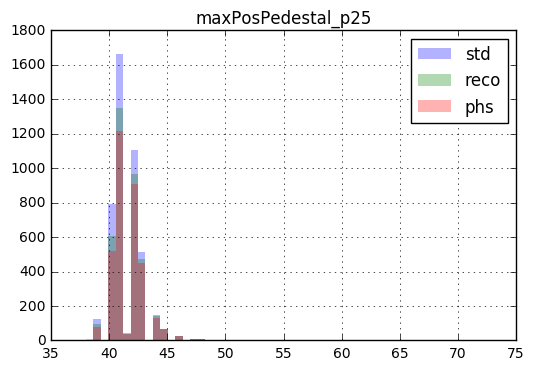

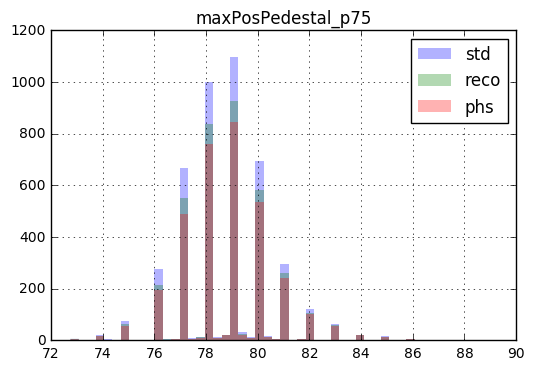

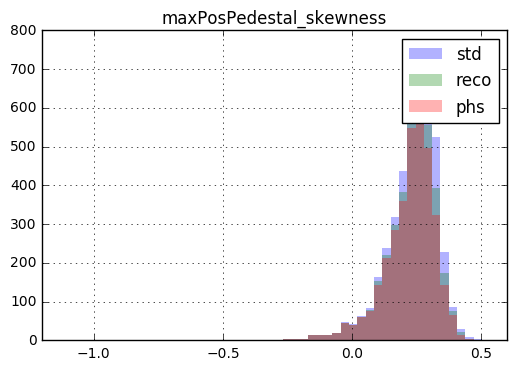

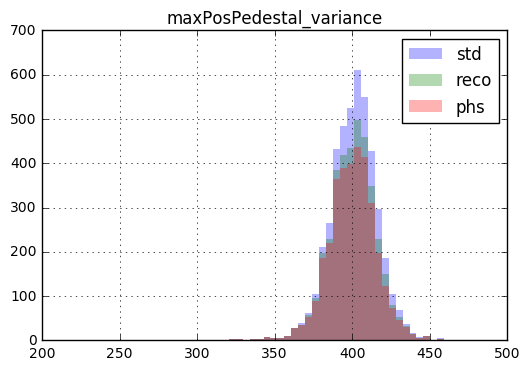

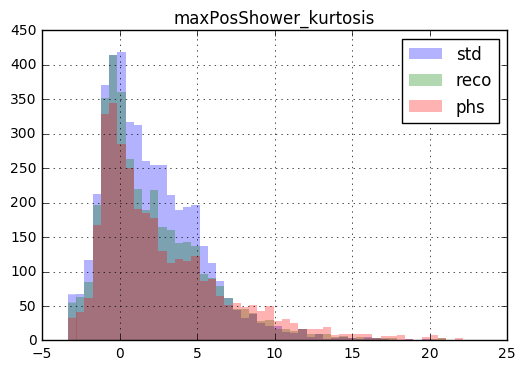

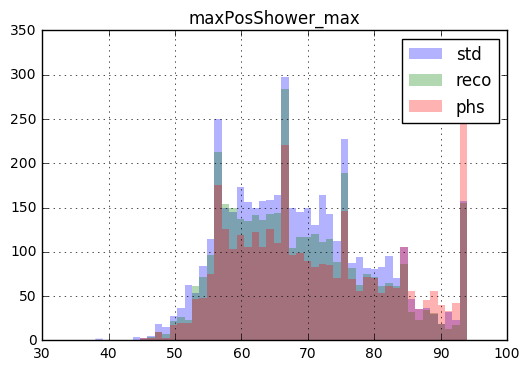

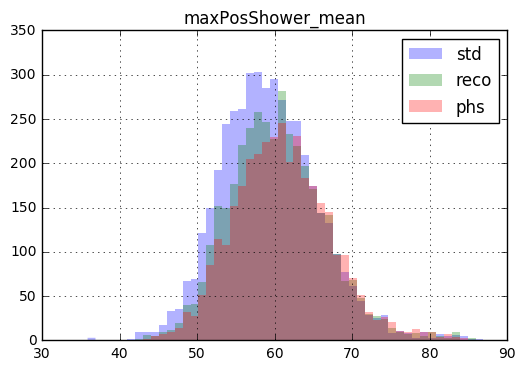

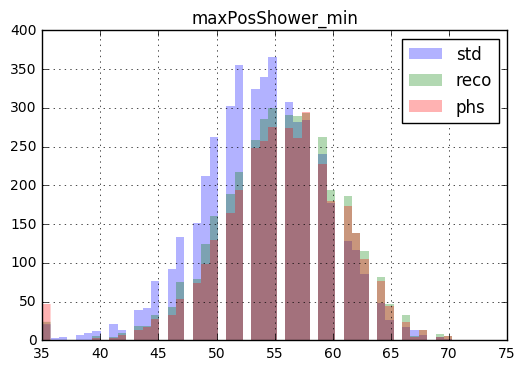

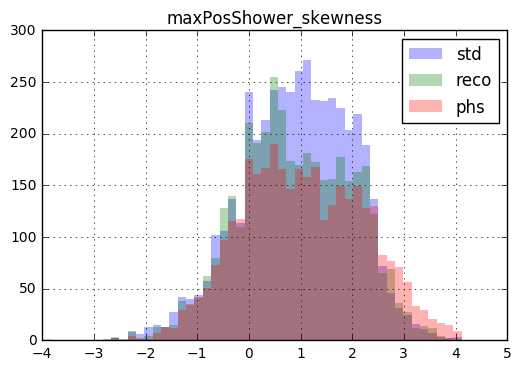

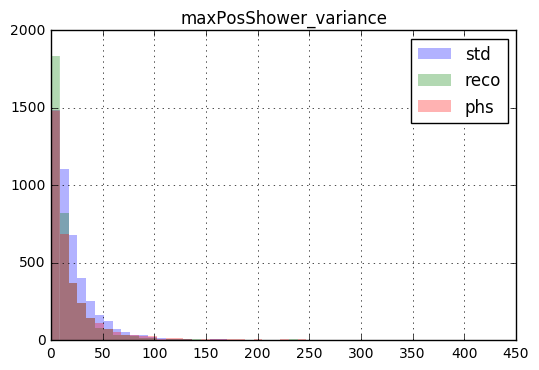

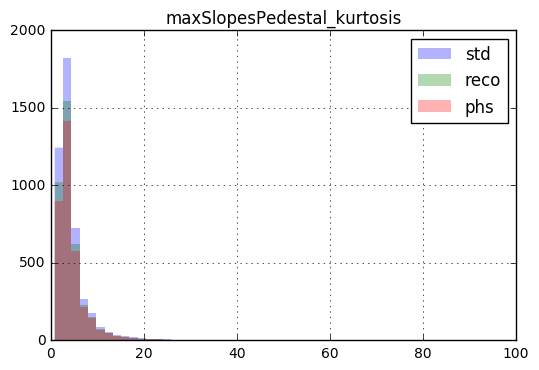

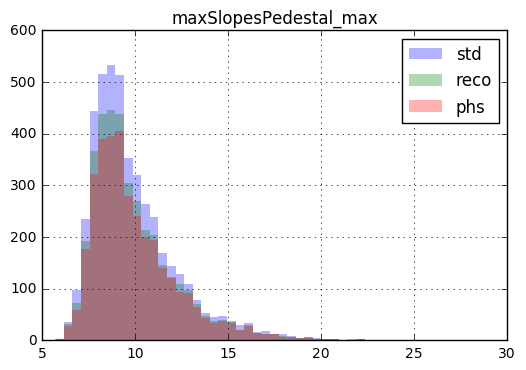

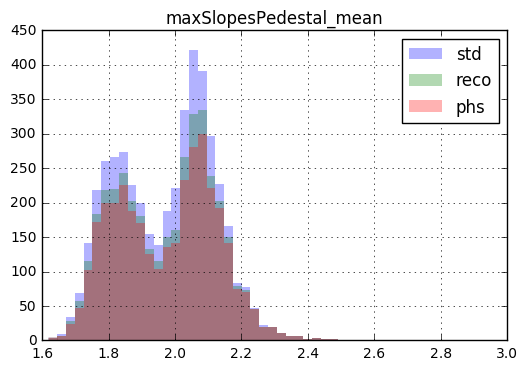

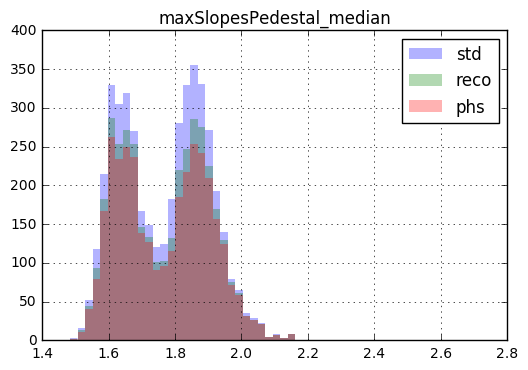

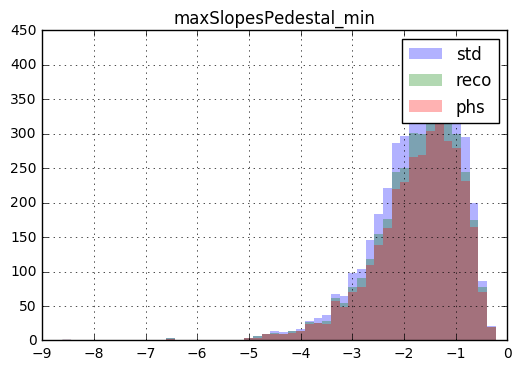

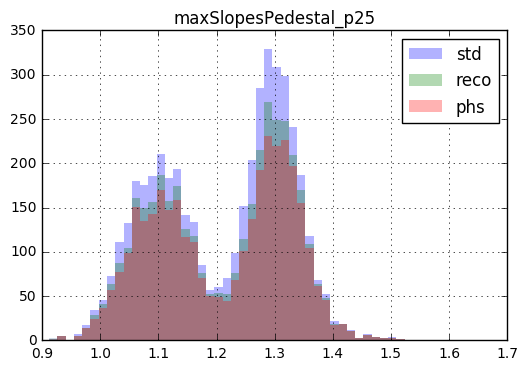

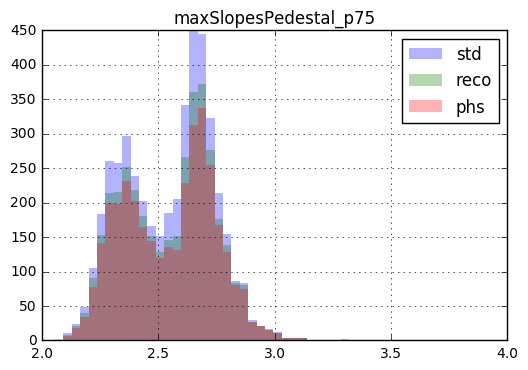

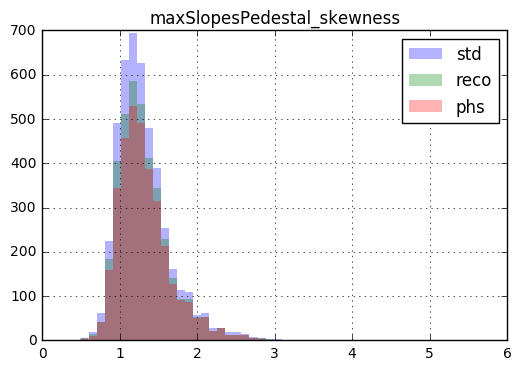

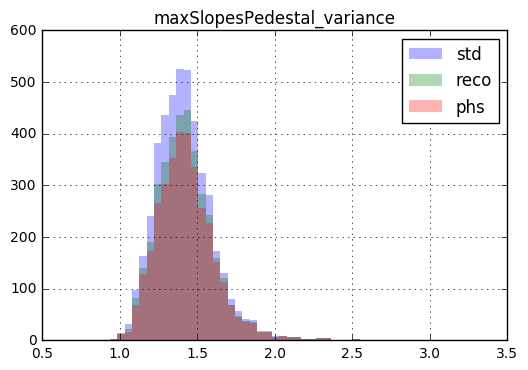

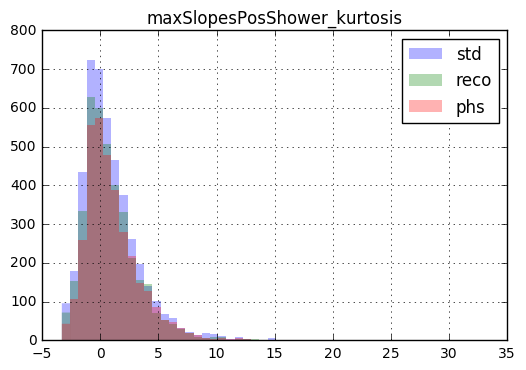

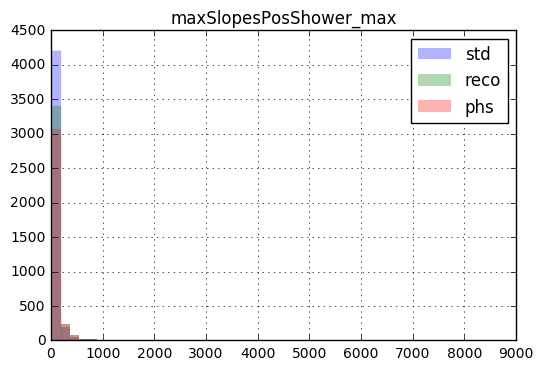

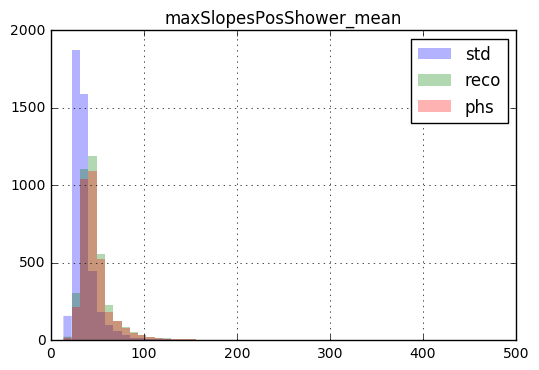

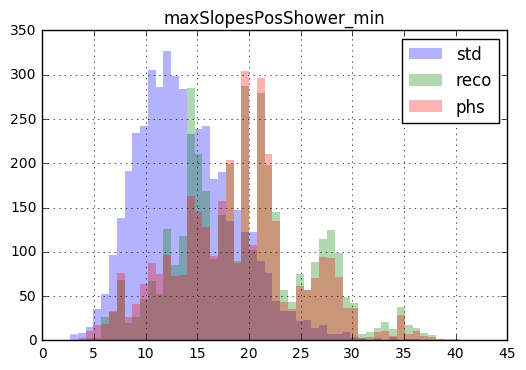

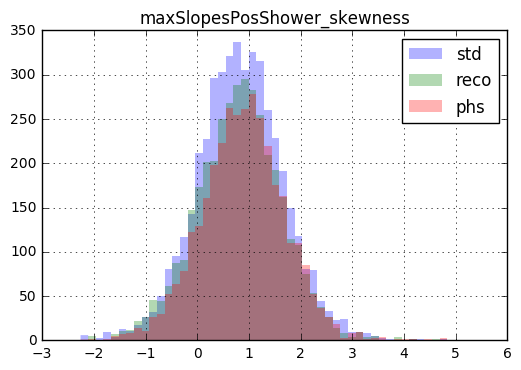

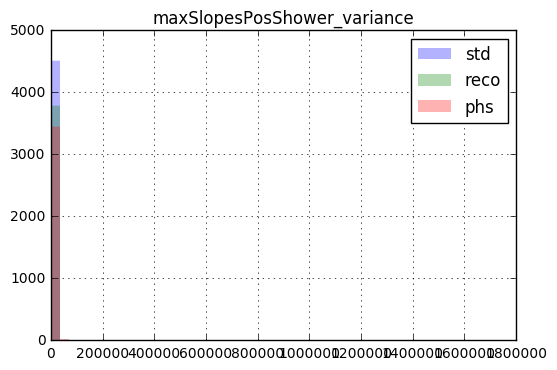

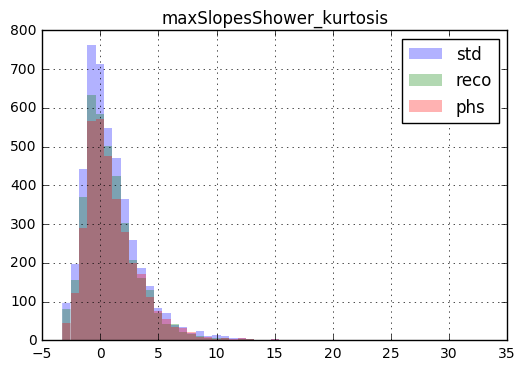

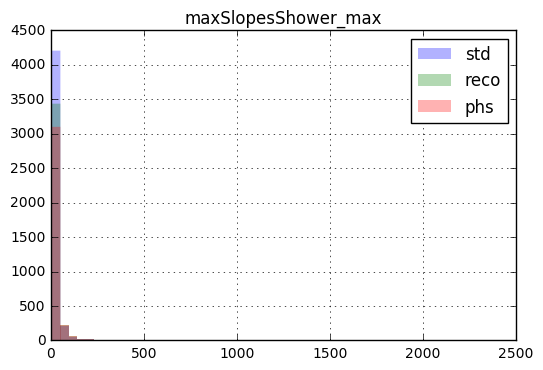

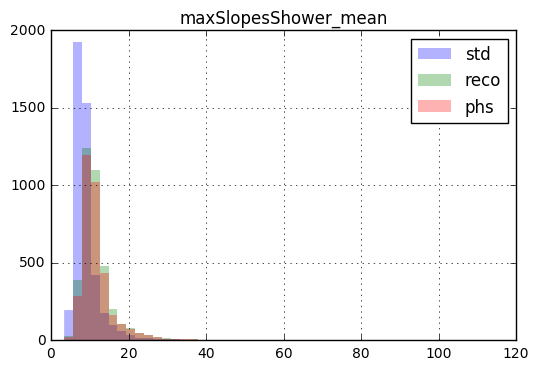

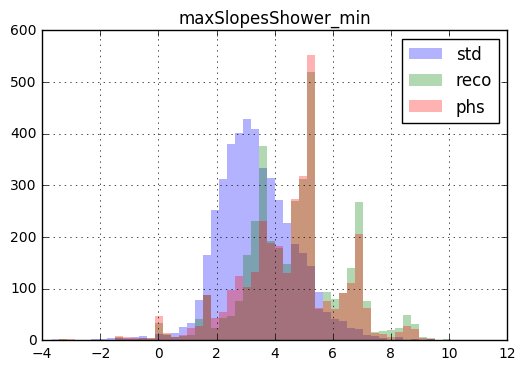

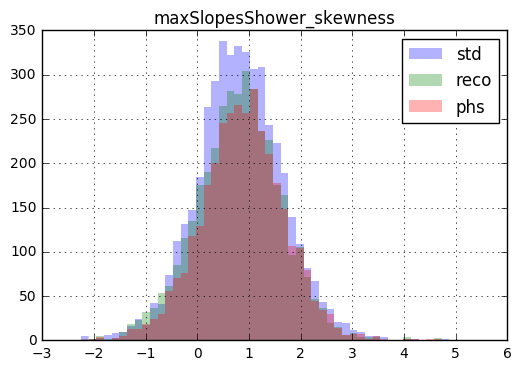

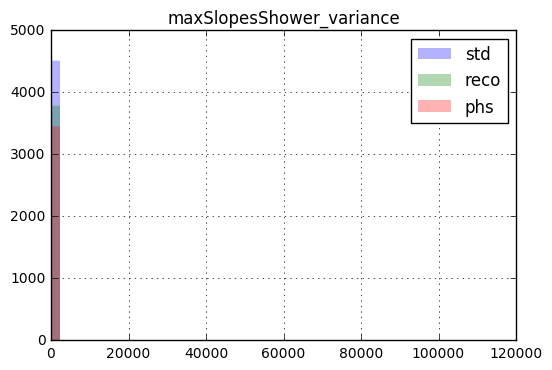

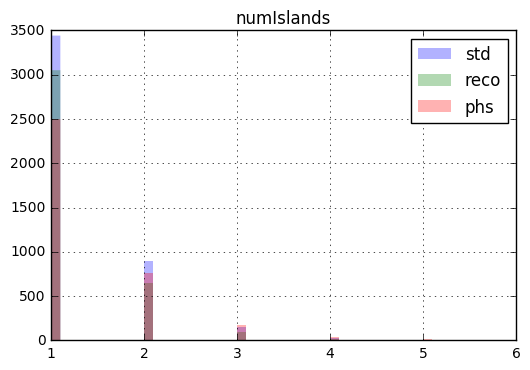

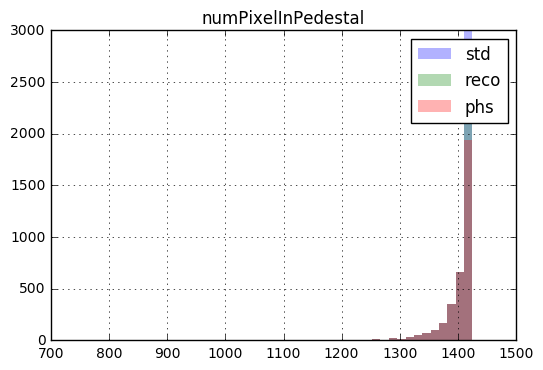

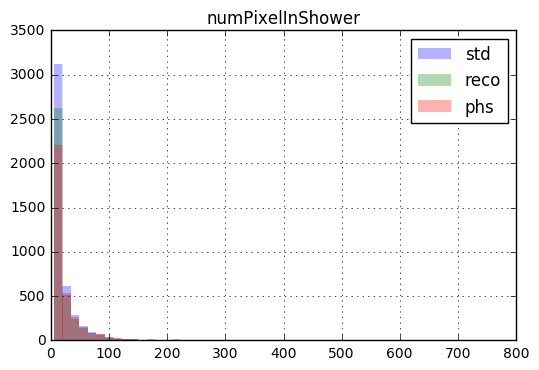

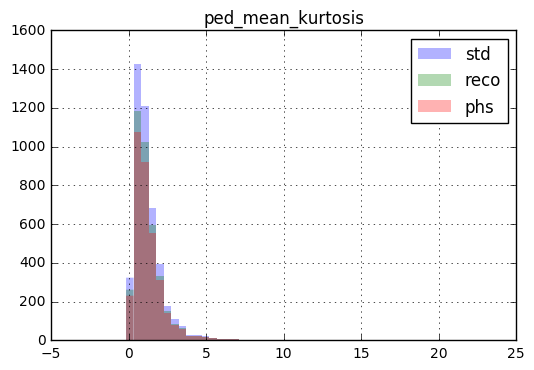

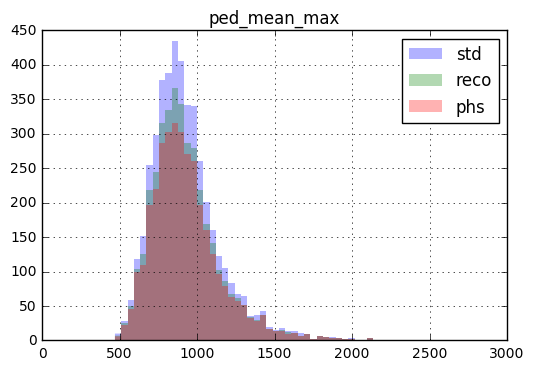

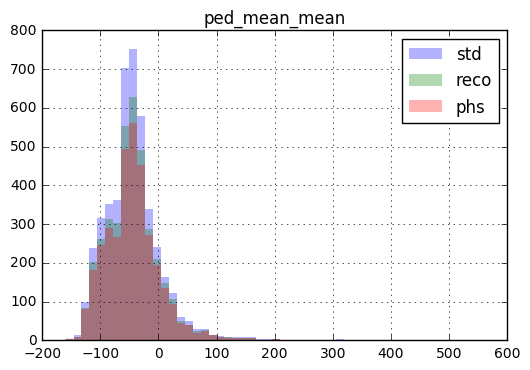

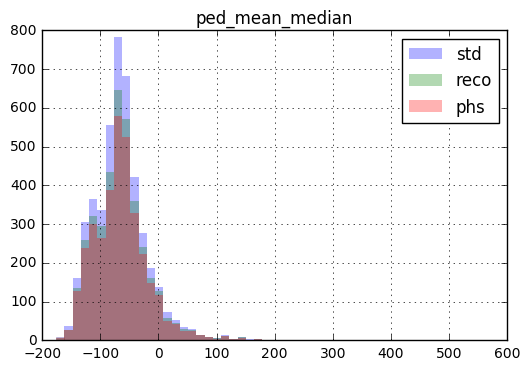

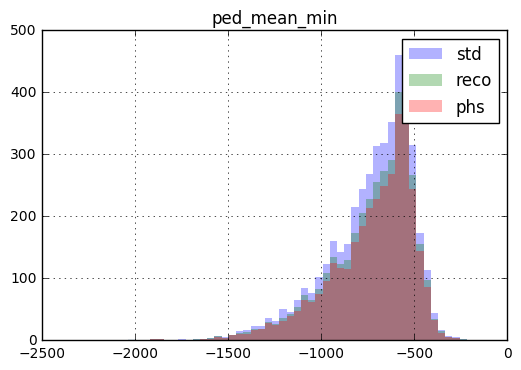

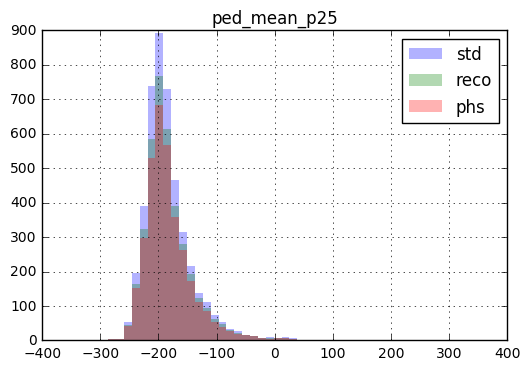

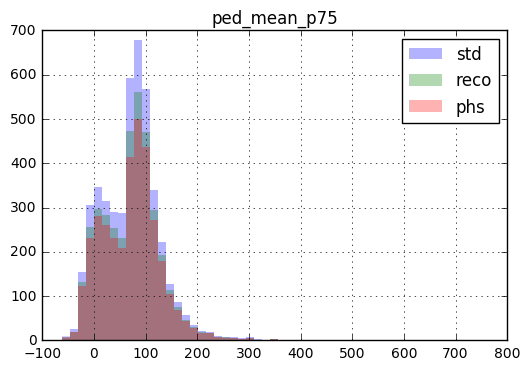

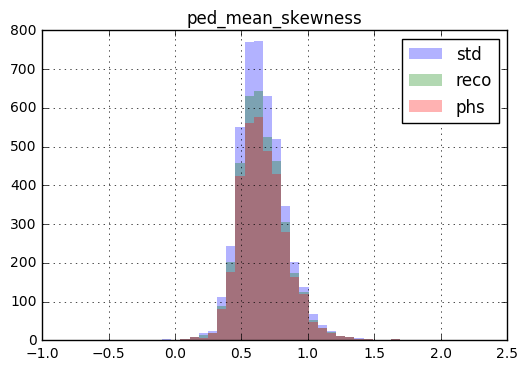

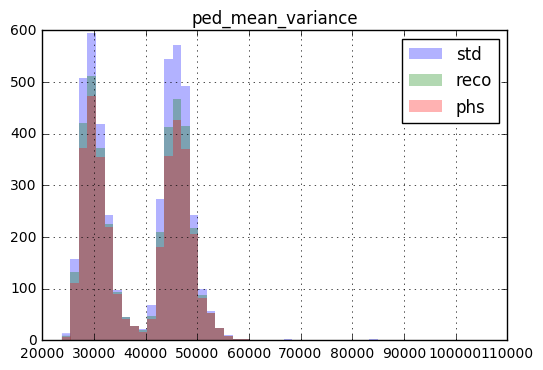

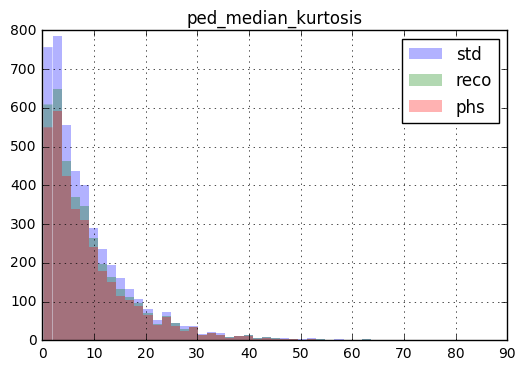

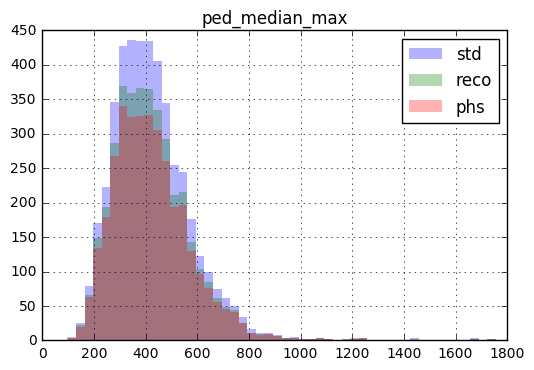

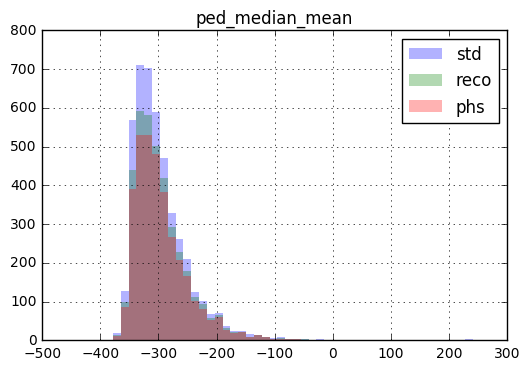

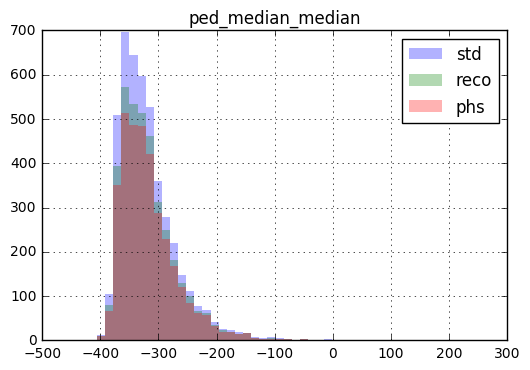

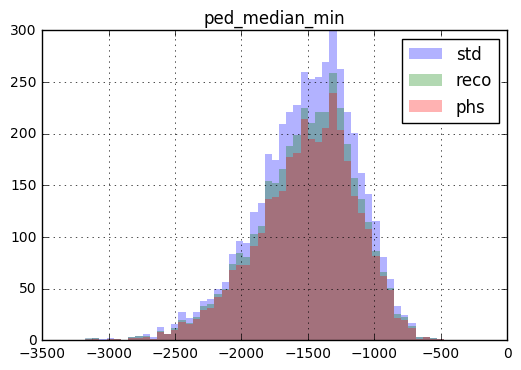

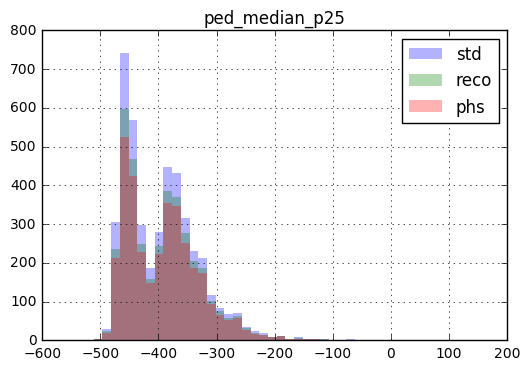

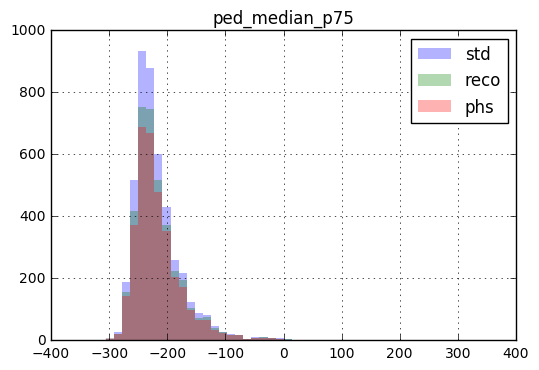

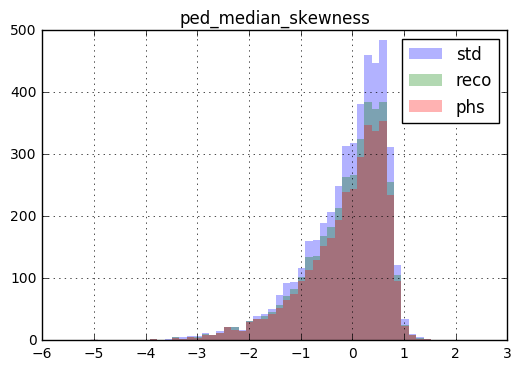

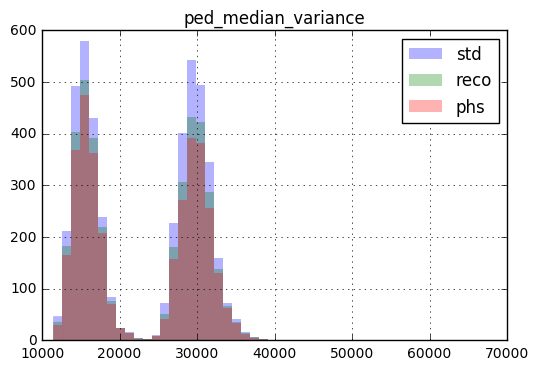

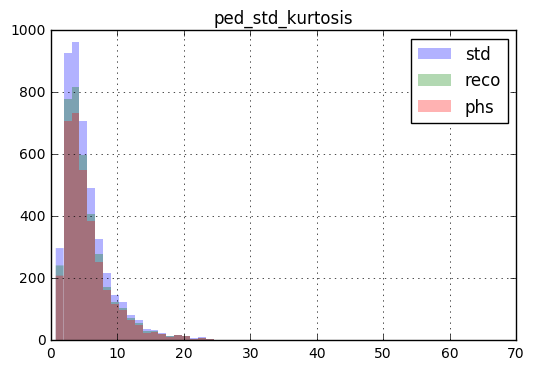

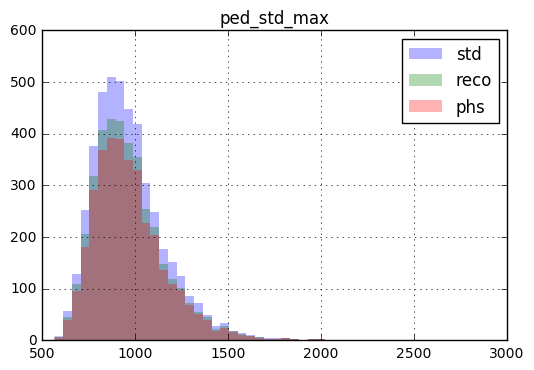

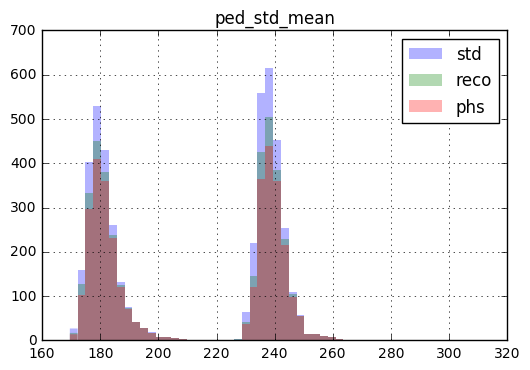

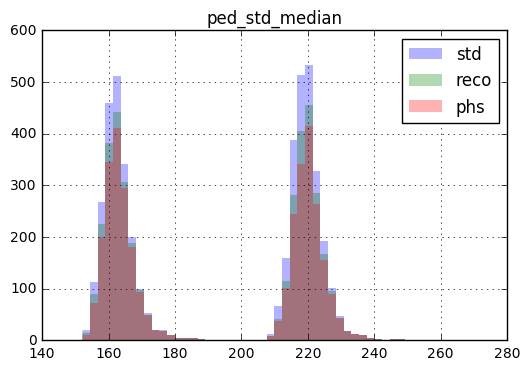

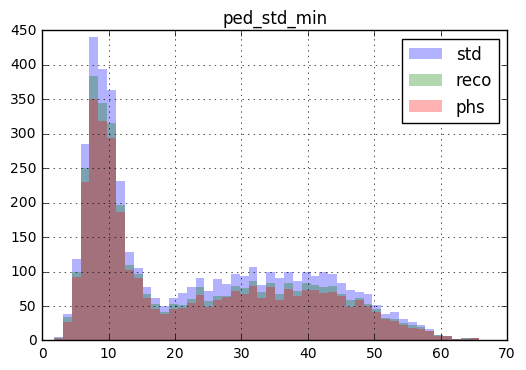

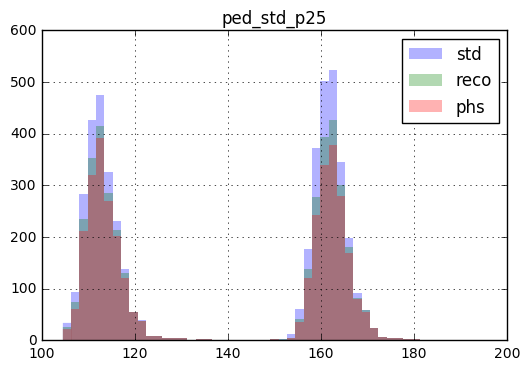

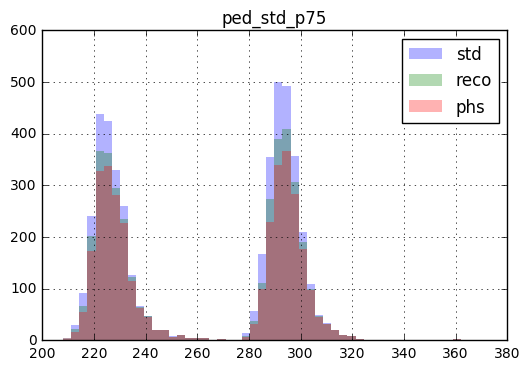

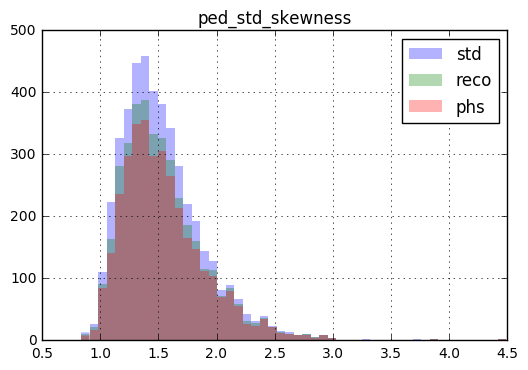

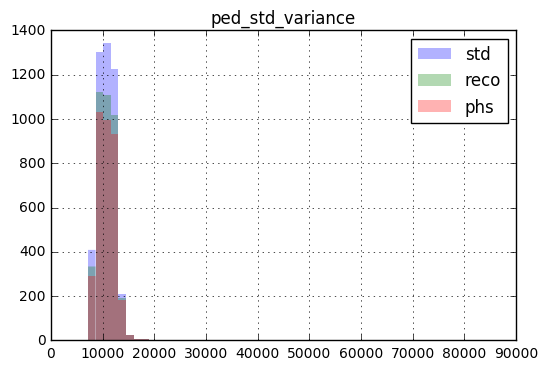

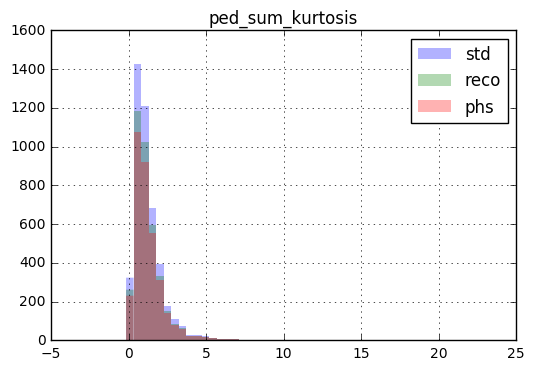

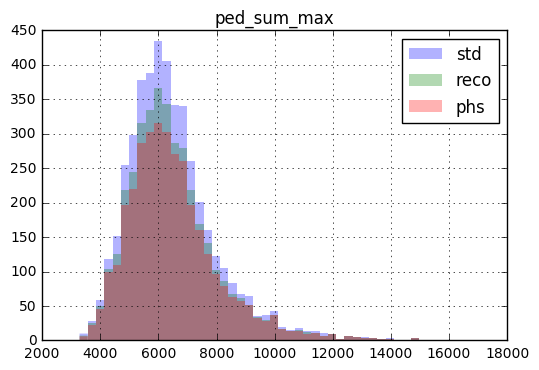

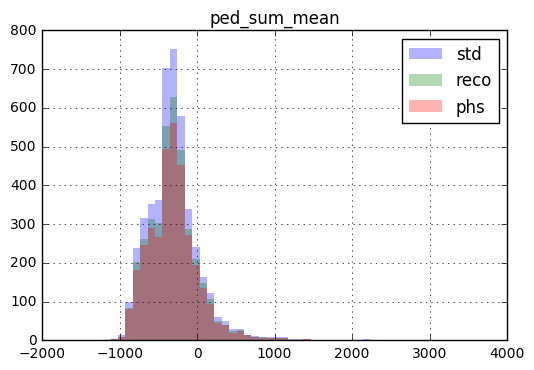

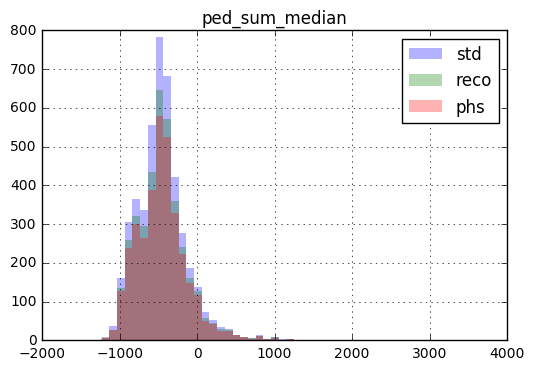

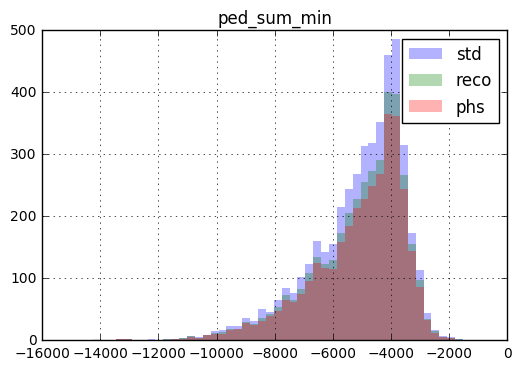

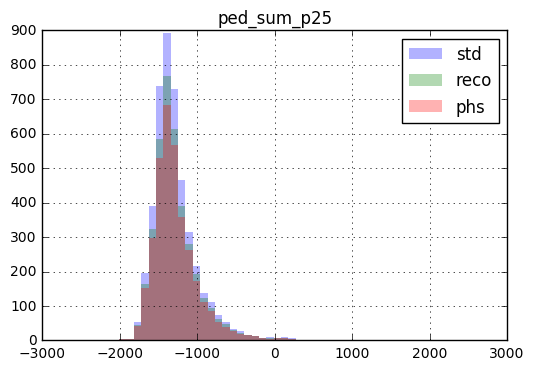

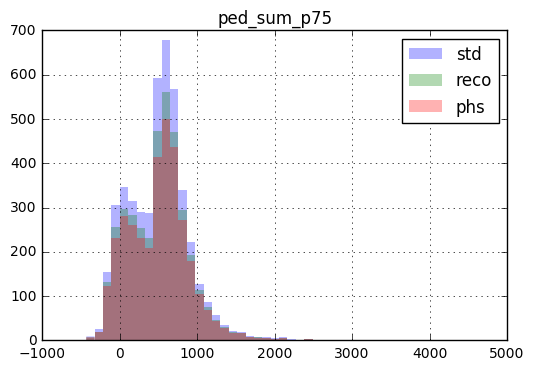

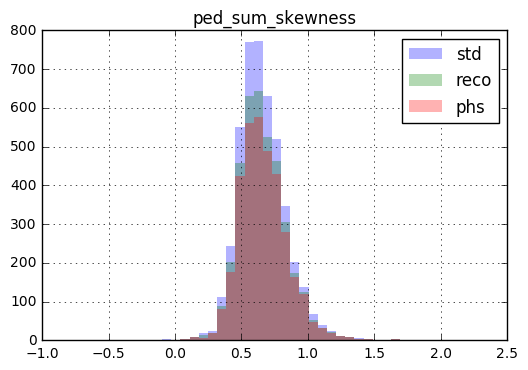

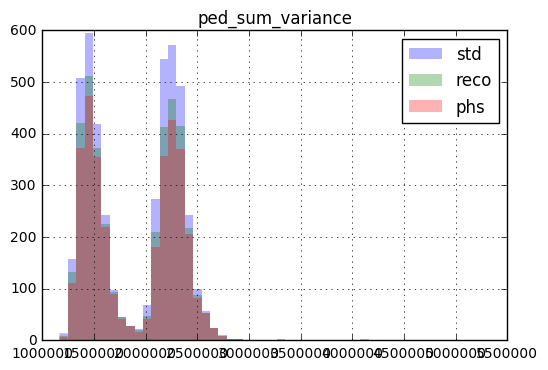

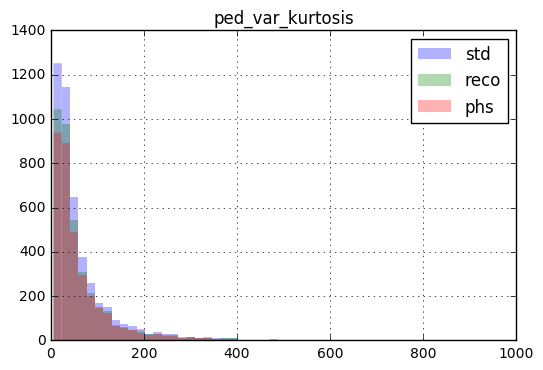

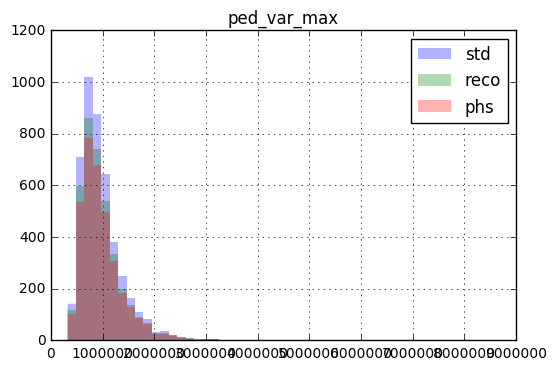

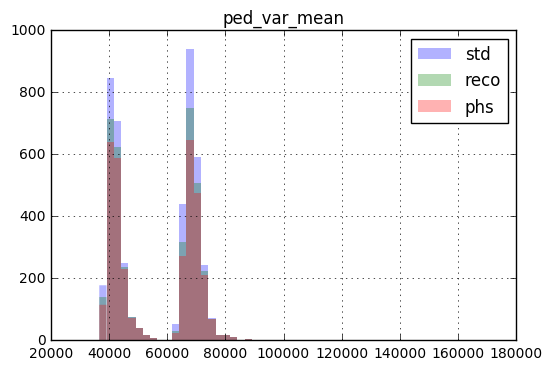

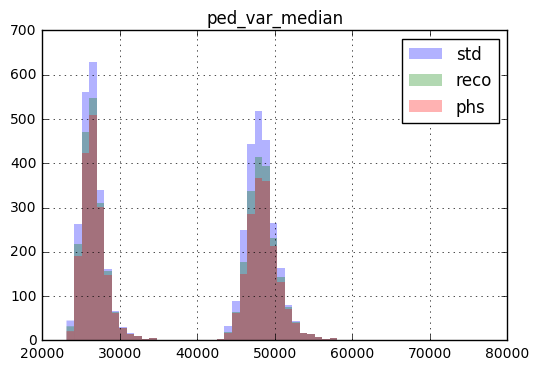

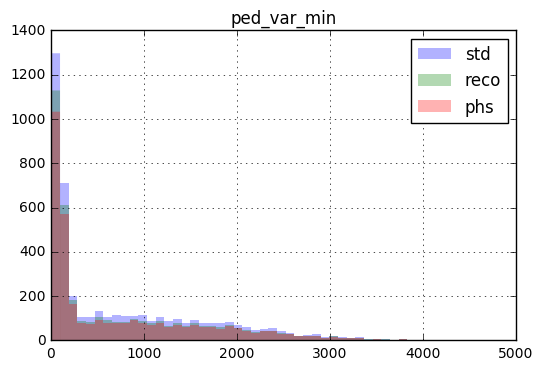

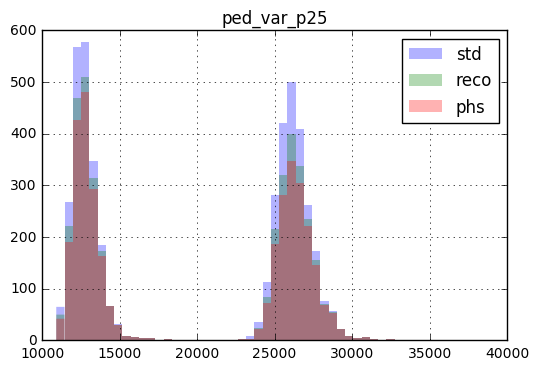

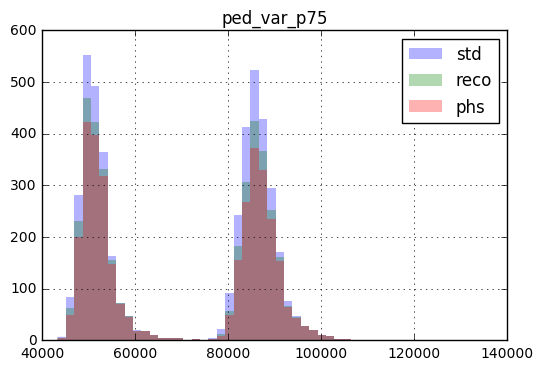

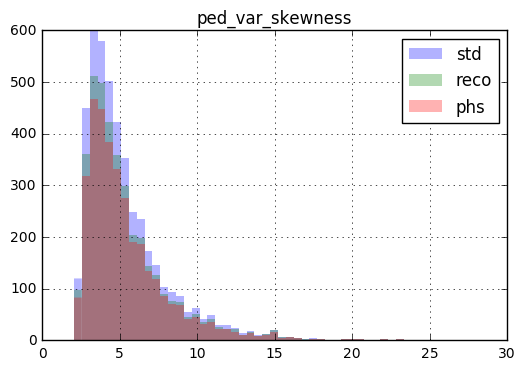

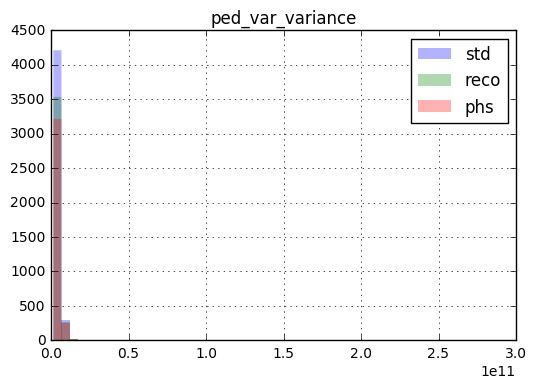

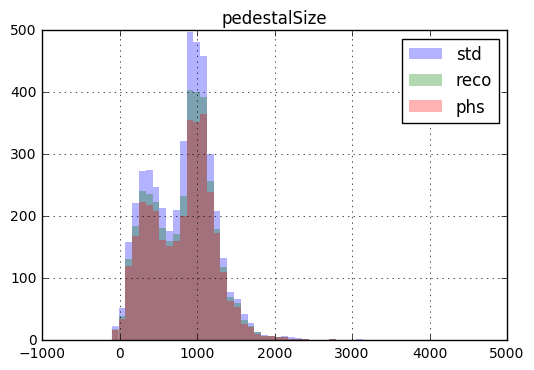

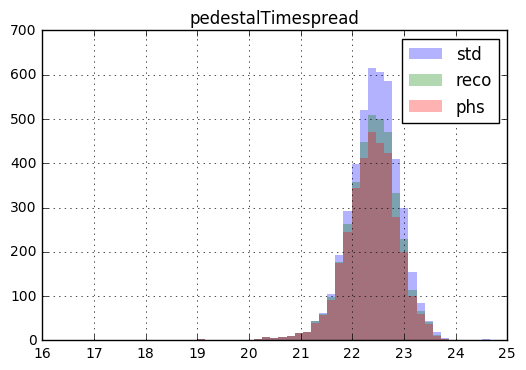

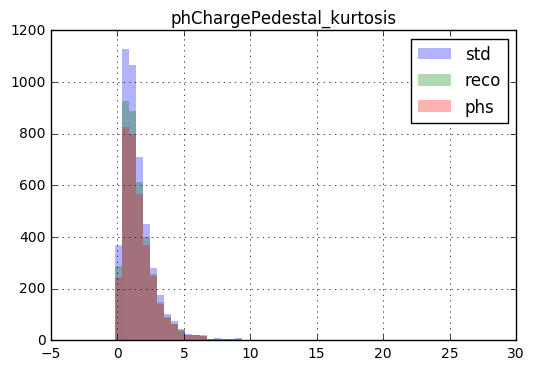

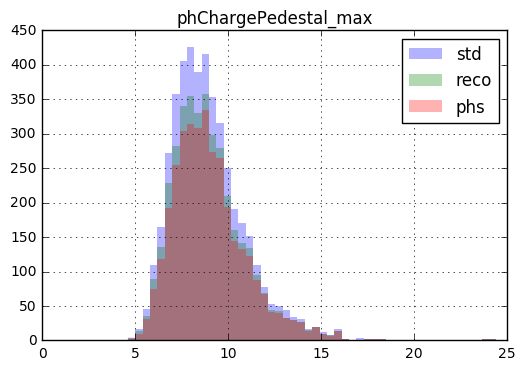

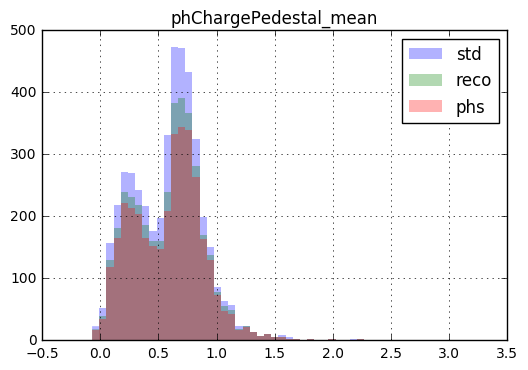

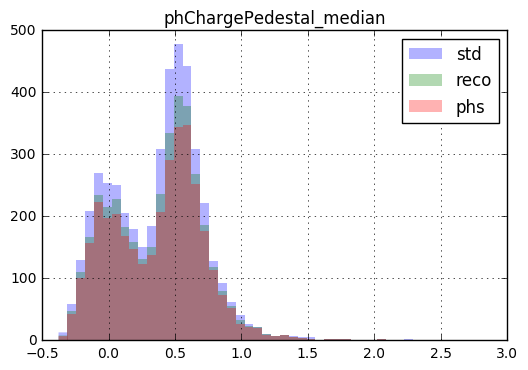

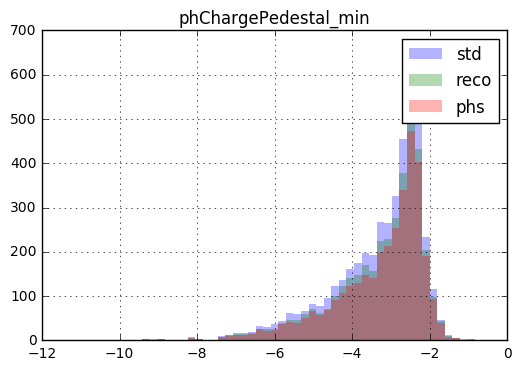

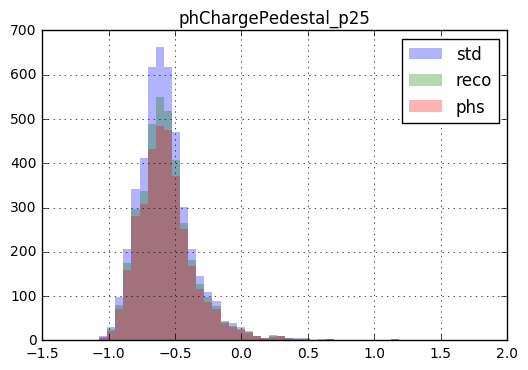

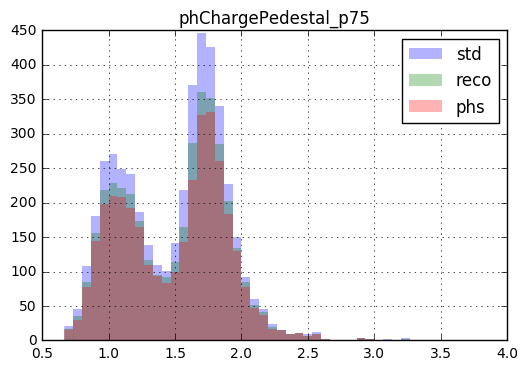

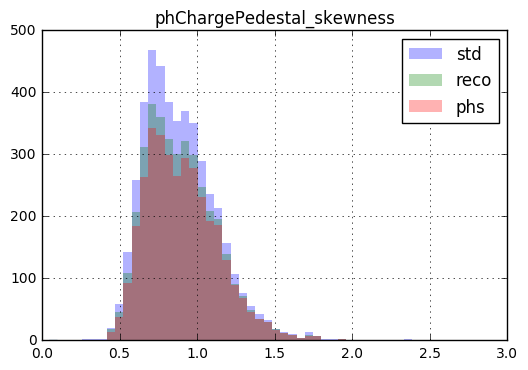

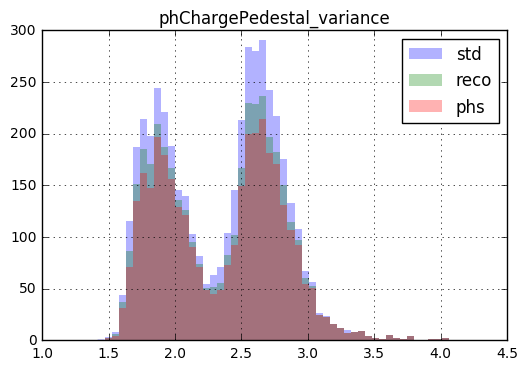

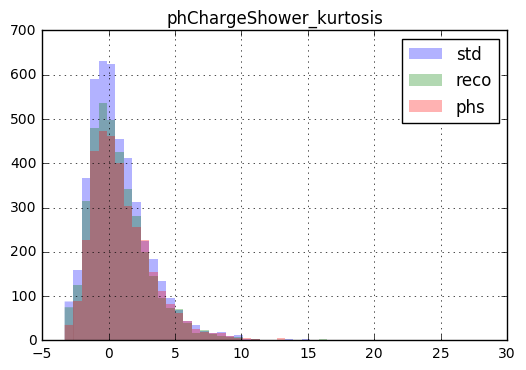

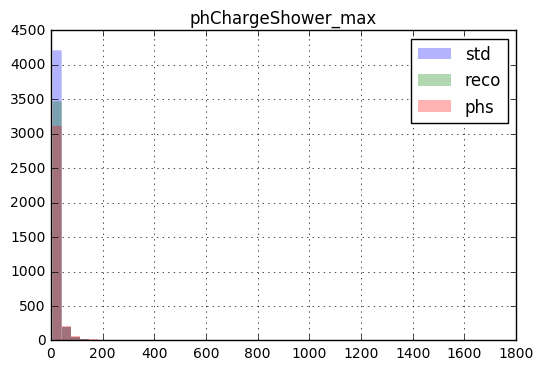

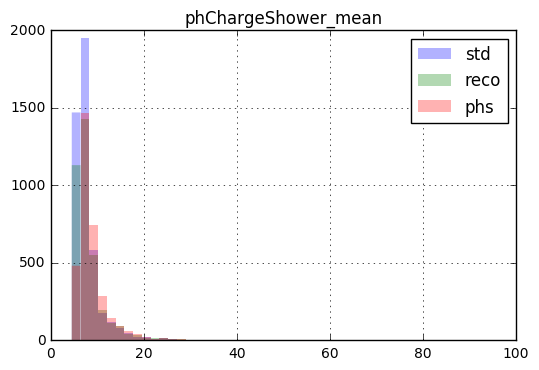

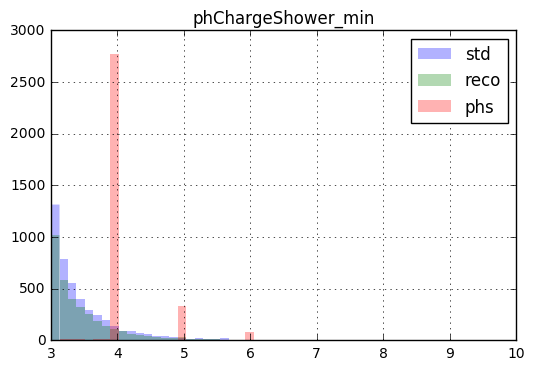

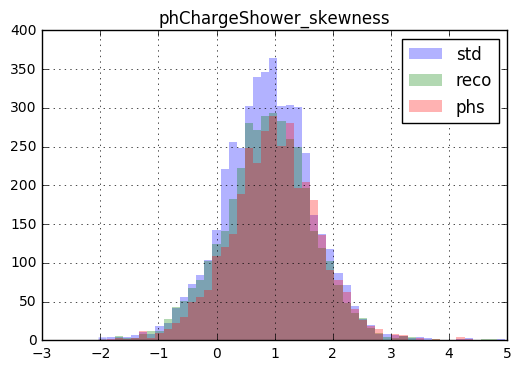

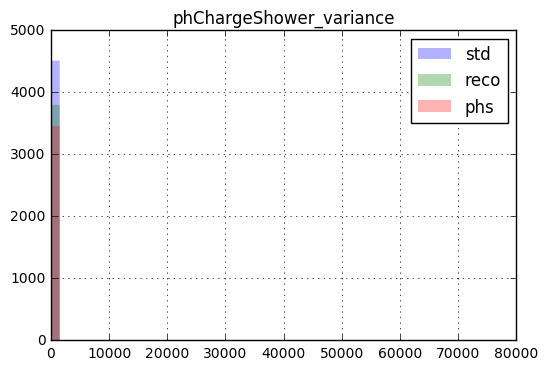

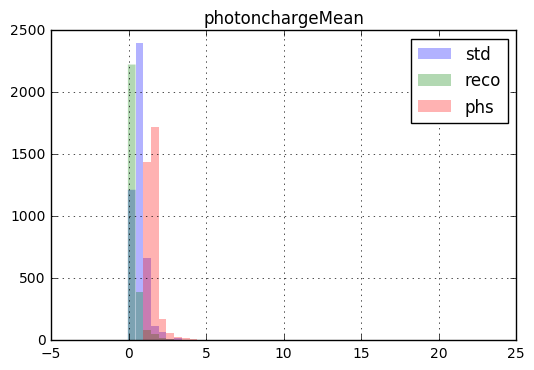

In [15]:
import re
black_list = "(" + ")|(".join([
    ".*?Off.*?",
    "Az.*",
    "Zd.*",
    "EventNum",
    "NIGHT",
    "NPIX",
    "NROI",
    "RUNID",
    "TriggerType",
    "fluct.*"
]) + ")"

log_list = "(" + ")|(".join([
    "arrTimePos.*Shower.*",
    "Slope_trans",
    "Leakage",
    "Size"
]) + ")"
for obs in observables:
    if re.match(black_list, obs):
        continue
    plt.figure()
    _min = analyses.std[obs].min()
    _max = analyses.std[obs].max()
    kwargs = {
    'bins': np.linspace(_min, _max, 51),
    'range': (_min, _max),
    'lw': 0,
    'alpha': 0.3
    }
    if re.match(log_list, obs):
        kwargs['log'] = True
    plt.title(obs)
    analyses.std[obs].hist(**kwargs, label='std')
    analyses.reco[obs].hist(**kwargs, label='reco')
    analyses.phs[obs].hist(**kwargs, label='phs')
    plt.legend()